In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

Read the input picture and transform to the HSV.

In [11]:
src = cv2.imread('input.png')
image = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(image)

Find the pdf, cdf and normalized it.

In [12]:
hist, bins = np.histogram(V.flatten(), 256, (0, 256))
cdf_original = hist.cumsum()
cdf_normalized = (
    (
        (
            (
                (cdf_original - cdf_original.min())
                / (cdf_original.max() - cdf_original.min())
            )
            * 255
        )
    )
    .round()
    .astype("uint8")
)
pdf_original = hist / hist.sum()

Map the original pixels to the new intensity.

In [13]:
V_equalized = cdf_normalized[V]
hist, bins = np.histogram(V_equalized.flatten(), 256, (0, 256))
cdf_equalized = hist.cumsum()
pdf_equalized = hist / hist.sum()

Show the result

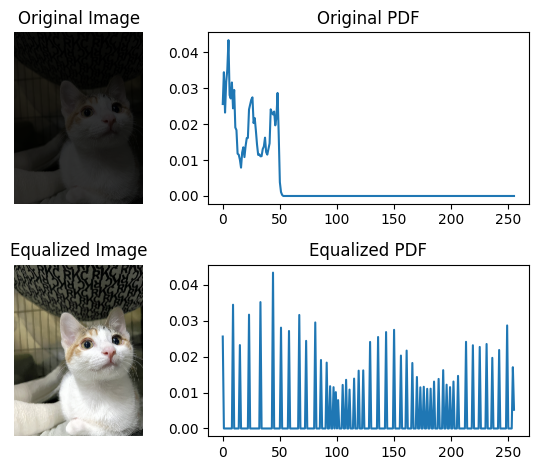

In [17]:
image_equalized = cv2.merge([H, S, V_equalized])
image_equalized = cv2.cvtColor(image_equalized, cv2.COLOR_HSV2BGR)
cv2.imwrite("output.png", image_equalized)
image_rbg = cv2.cvtColor(image, cv2.COLOR_HSV2RGB)
image_equalized_rgb = cv2.cvtColor(image_equalized, cv2.COLOR_BGR2RGB)
fig, axs = plt.subplots(2, 2, layout="tight")

ax = axs[0, 0]
ax.imshow(image_rbg)
ax.set_title("Original Image")
ax.axis("off")

ax = axs[0, 1]
ax.plot(pdf_original)
ax.set_title("Original PDF")

ax = axs[1, 0]
ax.imshow(image_equalized_rgb)
ax.set_title("Equalized Image")
ax.axis("off")

ax = axs[1, 1]
ax.plot(pdf_equalized)
ax.set_title("Equalized PDF")

fig.savefig('result.png', dpi=300, bbox_inches="tight")
plt.show()

Generate the 2D histogram of H and S channel

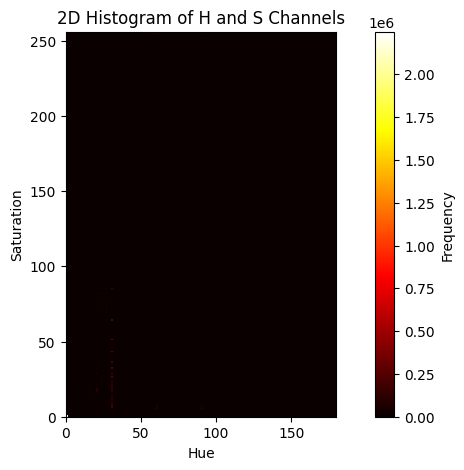

In [16]:
hist_2d, x_edges, y_edges = np.histogram2d(
    H.flatten(), S.flatten(), bins=(180, 256), range=[[0, 180], [0, 256]]
)
plt.figure(figsize=(10, 5))
plt.imshow(
    hist_2d.T,
    origin="lower",
    cmap="hot",
    interpolation="nearest",
    extent=[0, 180, 0, 256],
)
plt.colorbar(label='Frequency')
plt.xlabel("Hue")
plt.ylabel("Saturation")
plt.title("2D Histogram of H and S Channels")
plt.savefig('2d_histogram.png', dpi=300, bbox_inches='tight')
plt.show()